<a href="https://colab.research.google.com/github/KaanErdogdu/8_Bootcamp_Temel-Makine_-grenimi/blob/master/8_1_Odev_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
import datetime as dt
import re
from sklearn import datasets
iris = datasets.load_iris()
import warnings
warnings.filterwarnings('ignore')

In [27]:
projelogi=pd.read_csv("Logistic Reg Teknosa.csv")

In [28]:
projelogi.head()

,Week (Mon-Sun),Custom dimension 1,Sessions,Avg. pageviews per session,Avg. session length (sec),Product Detail Views,Product List Clicks,Product Adds To Cart,Product Checkouts,Transactions
0,2020|29,731C0F2E-DDC3-E811-90F9-00155D619647,189.0,4.89,311.0,1772.0,20.0,6.0,61.0,0.0
1,2020|30,4283B82C-20B2-EA11-80D0-00155D61134E,163.0,16.90,145.0,447.0,156.0,156.0,2067.0,14.0
2,2020|29,4A1E910F-F5B2-EA11-80D5-00155D7CD320,139.0,6.47,626.0,892.0,128.0,7.0,105.0,0.0
3,2020|29,4283B82C-20B2-EA11-80D0-00155D61134E,137.0,12.83,181.0,171.0,59.0,58.0,793.0,11.0
4,2020|28,73982672-3C90-E911-80CB-00155D61134E,121.0,5.83,684.0,33.0,5.0,0.0,0.0,0.0


In [29]:
projelogi.columns = ['week', 'user_id', 'sessions', 'page_session', 'avg_session_duration','product_view','product_click','add_to_cart','product_checkout','transactions']

In [30]:
projelogi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154763 entries, 0 to 154762
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   week                  154763 non-null  object 
 1   user_id               154759 non-null  object 
 2   sessions              154759 non-null  float64
 3   page_session          154748 non-null  float64
 4   avg_session_duration  154748 non-null  float64
 5   product_view          154759 non-null  float64
 6   product_click         154759 non-null  float64
 7   add_to_cart           154759 non-null  float64
 8   product_checkout      154752 non-null  float64
 9   transactions          154752 non-null  float64
dtypes: float64(8), object(2)
memory usage: 11.8+ MB


In [31]:
projelogi.nunique()

week                        5
user_id                 94960
sessions                  105
page_session             1879
avg_session_duration     3321
product_view              394
product_click             123
add_to_cart               113
product_checkout          332
transactions               34
dtype: int64

In [32]:
projelogi['week_j'] = projelogi['week'].str.split('|') 
projelogi['week_j']

0         [2020, 29]
1         [2020, 30]
2         [2020, 29]
3         [2020, 29]
4         [2020, 28]
             ...    
154758    [2020, 29]
154759    [2020, 29]
154760    [2020, 30]
154761    [2020, 31]
154762    [2020, 31]
Name: week_j, Length: 154763, dtype: object

In [33]:
projelogi_1 = projelogi.groupby(["week","user_id"]).agg({"sessions":"sum",
                                                            "page_session":"mean",
                                                            "avg_session_duration":"mean",
                                                            "product_view":"sum",
                                                            "product_click":"sum",
                                                            "add_to_cart":"sum",
                                                            "product_checkout":"sum",
                                                            "transactions":"sum"}).reset_index()

projelogi_1.head(10)

,week,user_id,sessions,page_session,avg_session_duration,product_view,product_click,add_to_cart,product_checkout,transactions
0,2020|27,0000279A-87C8-E811-90F9-00155D619647,3.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0
1,2020|27,000219E1-DBC3-E811-90F9-00155D619647,4.0,4.50,206.0,21.0,0.0,0.0,0.0,0.0
2,2020|27,00039966-101C-E911-80C7-00155D619677,1.0,4.00,26.0,0.0,0.0,0.0,3.0,0.0
3,2020|27,000906F6-40B5-EA11-80D0-00155D61134E,8.0,2.00,25.0,41.0,0.0,0.0,0.0,0.0
4,2020|27,0009F07C-A37B-E911-80CA-00155D7CD320,4.0,1.75,54.0,27.0,0.0,0.0,0.0,0.0
5,2020|27,000B0994-B7B8-EA11-80D0-00155D61134E,2.0,1.00,0.0,6.0,0.0,0.0,0.0,0.0
6,2020|27,000D22CD-6507-E911-80C7-00155D619677,2.0,16.50,846.0,13.0,0.0,1.0,15.0,1.0
7,2020|27,000DD9E4-BABB-EA11-80D0-00155D61134E,10.0,5.50,191.0,33.0,0.0,1.0,9.0,1.0
8,2020|27,000E323F-A797-EA11-80D0-00155D61134E,1.0,1.00,0.0,2.0,0.0,0.0,0.0,0.0
9,2020|27,001318CF-A5C5-E811-90F9-00155D619647,2.0,5.00,152.0,2.0,1.0,0.0,0.0,0.0


In [34]:
projelogi_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154759 entries, 0 to 154758
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   week                  154759 non-null  object 
 1   user_id               154759 non-null  object 
 2   sessions              154759 non-null  float64
 3   page_session          154744 non-null  float64
 4   avg_session_duration  154744 non-null  float64
 5   product_view          154759 non-null  float64
 6   product_click         154759 non-null  float64
 7   add_to_cart           154759 non-null  float64
 8   product_checkout      154759 non-null  float64
 9   transactions          154759 non-null  float64
dtypes: float64(8), object(2)
memory usage: 11.8+ MB


In [35]:
projelogi_1.nunique()

week                        5
user_id                 94960
sessions                  105
page_session             1879
avg_session_duration     3321
product_view              394
product_click             123
add_to_cart               113
product_checkout          332
transactions               34
dtype: int64

In [36]:
def func(x):
  if x >= 1:
    return 1
  elif x==0:
    return 0

In [37]:
projelogi_1["transactions_dummy"]= projelogi_1["transactions"].apply(func)
projelogi_1.transactions_dummy.value_counts()

0    141728
1     13031
Name: transactions_dummy, dtype: int64

In [38]:
projelogi_1.head()

,week,user_id,sessions,page_session,avg_session_duration,product_view,product_click,add_to_cart,product_checkout,transactions,transactions_dummy
0,2020|27,0000279A-87C8-E811-90F9-00155D619647,3.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2020|27,000219E1-DBC3-E811-90F9-00155D619647,4.0,4.50,206.0,21.0,0.0,0.0,0.0,0.0,0
2,2020|27,00039966-101C-E911-80C7-00155D619677,1.0,4.00,26.0,0.0,0.0,0.0,3.0,0.0,0
3,2020|27,000906F6-40B5-EA11-80D0-00155D61134E,8.0,2.00,25.0,41.0,0.0,0.0,0.0,0.0,0
4,2020|27,0009F07C-A37B-E911-80CA-00155D7CD320,4.0,1.75,54.0,27.0,0.0,0.0,0.0,0.0,0


In [39]:
projelogi_1.isnull().sum()

week                     0
user_id                  0
sessions                 0
page_session            15
avg_session_duration    15
product_view             0
product_click            0
add_to_cart              0
product_checkout         0
transactions             0
transactions_dummy       0
dtype: int64

In [40]:
projelogi_1=projelogi_1.dropna(subset=["page_session","avg_session_duration"])
projelogi_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154744 entries, 0 to 154758
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   week                  154744 non-null  object 
 1   user_id               154744 non-null  object 
 2   sessions              154744 non-null  float64
 3   page_session          154744 non-null  float64
 4   avg_session_duration  154744 non-null  float64
 5   product_view          154744 non-null  float64
 6   product_click         154744 non-null  float64
 7   add_to_cart           154744 non-null  float64
 8   product_checkout      154744 non-null  float64
 9   transactions          154744 non-null  float64
 10  transactions_dummy    154744 non-null  int64  
dtypes: float64(8), int64(1), object(2)
memory usage: 14.2+ MB


In [42]:
X = projelogi_1[['sessions', 'page_session', 'avg_session_duration','product_view','product_click','add_to_cart','product_checkout']]
y = projelogi_1.transactions_dummy
print(X[:5])
print(y[:5])

   sessions  page_session  ...  add_to_cart  product_checkout
0       3.0          1.00  ...          0.0               0.0
1       4.0          4.50  ...          0.0               0.0
2       1.0          4.00  ...          0.0               3.0
3       8.0          2.00  ...          0.0               0.0
4       4.0          1.75  ...          0.0               0.0

[5 rows x 7 columns]
0    0
1    0
2    0
3    0
4    0
Name: transactions_dummy, dtype: int64


In [43]:
X = projelogi_1[['sessions','page_session','product_view','product_click','add_to_cart','product_checkout']]
y = projelogi_1.transactions_dummy
print(X[:5])
print(y[:5])

   sessions  page_session  ...  add_to_cart  product_checkout
0       3.0          1.00  ...          0.0               0.0
1       4.0          4.50  ...          0.0               0.0
2       1.0          4.00  ...          0.0               3.0
3       8.0          2.00  ...          0.0               0.0
4       4.0          1.75  ...          0.0               0.0

[5 rows x 6 columns]
0    0
1    0
2    0
3    0
4    0
Name: transactions_dummy, dtype: int64


Fiilna with 0 yapılcak page_session ve avg session kontrol edilecek


In [59]:
from sklearn.neighbors import KNeighborsClassifier
komsular = KNeighborsClassifier(n_neighbors=10)


In [60]:
projelogi_1.transactions_dummy.value_counts()

0    141715
1     13029
Name: transactions_dummy, dtype: int64

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 40)

In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [73]:
knn.score(X_test, y_test)


0.9274936185337168

In [65]:
from sklearn.model_selection import cross_val_score
cvscores_3 = cross_val_score(knn, X_test, y_test, cv=3)
print('cv =  3 ---> Ortalama çarpraz doğrulama skoru : ', np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(knn, X_test, y_test, cv=10)
print('cv = 10 ---> Ortalama çarpraz doğrulama skoru : ', np.mean(cvscores_10))

cv =  3 ---> Ortalama çarpraz doğrulama skoru :  0.9222915565710069
cv = 10 ---> Ortalama çarpraz doğrulama skoru :  0.9224854191707751


In [66]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_olcekli = ss.fit_transform(X)

In [68]:
X_train_olcekli, X_test_olcekli, y_train, y_test = train_test_split(X_olcekli, y, test_size=0.2, random_state = 40)

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train_olcekli,y_train)
knn.score(X_test_olcekli, y_test)

0.9270089502084073

In [69]:
komsu_sayisi = np.arange(8, 17)
egitim_kumesi_skoru = np.empty(len(komsu_sayisi))
test_kumesi_skoru = np.empty(len(komsu_sayisi))

In [70]:
for i, k in enumerate(komsu_sayisi):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    egitim_kumesi_skoru[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_kumesi_skoru[i] = knn.score(X_test, y_test)

NameError: ignored

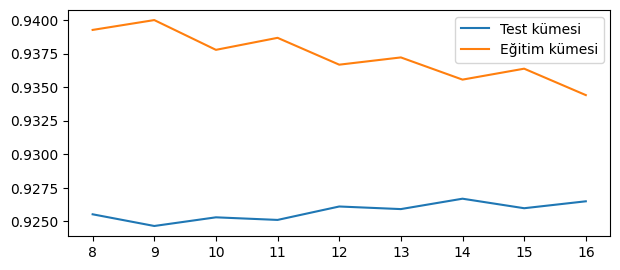

In [71]:
plt.figure(figsize=(7,3), dpi = 100)
plt.plot(komsu_sayisi, test_kumesi_skoru, label = 'Test kümesi')
plt.plot(komsu_sayisi, egitim_kumesi_skoru, label = 'Eğitim kümesi')
plt.legend()
plt.title('Komşu Sayılarına Göre Model Skoru (k-NN)', fontdict= baslik_font)
plt.xlabel('Komşu Sayısı', fontdict= eksen_font)
plt.ylabel('Doğruluk', fontdict= eksen_font)
plt.show()